# Tabular Data Science - Project

## Categorial feature selection using Chi-squared

To demonstrate the process program will run it step by step on one data set,
and after program run the process automatically on 3 other datasets and prints results.

If you want to see the process on another dataset or another target index change it few lines below.

In [115]:
# import python pacakges
from sklearn.feature_selection import SelectKBest, chi2

In [116]:
# import our module
import categorialSelection as cs

In [117]:
THRESHOLD = 10000

###### First dataset is: Wine reviews Dataset. 

In [118]:
# Here you can change the name and target index to see process with other given datasets
ds = "wine_ds.csv"
target_column_index = 4       # target column is Points

After we chose a target column we need to load the csv file.

In [119]:
print("Start working on:", ds)
X, y, features, original_ds_x, original_ds_y = cs.ds_loader(ds, target_column_index)

Start working on: wine_ds.csv


In [120]:
# print some info of features and scores before reduction
print("Original number of features:", X.shape[1])

Original number of features: 13


Call selectKBest package to get a score for each column, higher score means 
that column is more relevant to chosen target column

In [121]:
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)
features, scores = cs.sort_scores(selector, features)

To give the user an inforamtion about the process, program prints scores list and then display an intuitive graph to user.

In [122]:
cs.showScores(features, scores, "Original features with their scores:")

Original features with their scores:
Feature: region_2,   Score: 1777
Feature: country,   Score: 2023
Feature: taster_name,   Score: 3881
Feature: taster_twitter_handle,   Score: 10832
Feature: region_1,   Score: 26329
Feature: variety,   Score: 29683
Feature: winery,   Score: 128710
Feature: province,   Score: 143412
Feature: description,   Score: 574379
Feature: title,   Score: 1038012
Feature: price,   Score: 1292218
Feature: nan,   Score: 7273253
Feature: designation,   Score: 11642395


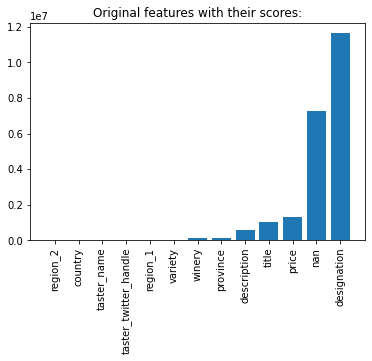

(['region_2',
  'country',
  'taster_name',
  'taster_twitter_handle',
  'region_1',
  'variety',
  'winery',
  'province',
  'description',
  'title',
  'price',
  'nan',
  'designation'],
 [1777,
  2023,
  3881,
  10832,
  26329,
  29683,
  128710,
  143412,
  574379,
  1038012,
  1292218,
  7273253,
  11642395])

In [123]:
cs.showGraph(features, scores, "Original features with their scores:")

Select only the most effective columns to be kept in the reduced data set
program need to determine a K which will represent the number of the highest scores columns we want to keep in the data set.

First function computes how many columns have score above the threshold, 
default threshold is 10000.

In [124]:
threshold_k = cs.getK_threshold(scores, threshold=THRESHOLD)

In [125]:
threshold_k

10

Second function looks for an elbow point in graph, and return K as the number of columns above the elbow point.

In [126]:
elbow_point_k = cs.getK_elbow_point(scores)

In [127]:
elbow_point_k

2

Finally program takes the minimal K from both functions and prints results to user.

In [128]:
k = min(threshold_k, elbow_point_k)
print("K chosen by elbow_point is:", elbow_point_k)
print("K chosen by threshold (" + str(THRESHOLD) + ") is:", threshold_k)
print("Minimal K is:", k)

K chosen by elbow_point is: 2
K chosen by threshold (10000) is: 10
Minimal K is: 2


After program calculated K, program reduces the data set and reduces features and scores list

In [129]:
reduced_features = features[-k:]
reduced_scores = scores[-k:]
reduced_x = cs.reduce_features(features, reduced_features, original_ds_x)

Display reduced features and their scores:

In [130]:
cs.showScores(reduced_features, reduced_scores, "After reduction:")

After reduction:
Feature: nan,   Score: 7273253
Feature: designation,   Score: 11642395


Display a graph of reduced features and their scores:

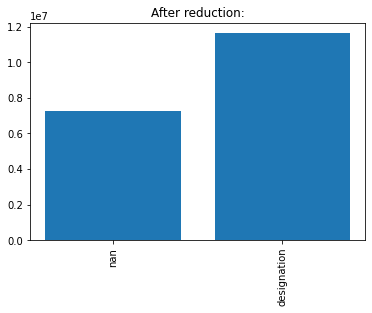

(['nan', 'designation'], [7273253, 11642395])

In [131]:
cs.showGraph(reduced_features, reduced_scores, "After reduction:")

In [132]:
reduced_x

12                                        13
0              variety                                    winery
1          White Blend                                   Nicosia
2       Portuguese Red                       Quinta dos Avidagos
3           Pinot Gris                                 Rainstorm
4             Riesling                                St. Julian
...                ...                                       ...
129967        Riesling  Dr. H. Thanisch (Erben Müller-Burggraef)
129968      Pinot Noir                                  Citation
129969  Gewürztraminer                           Domaine Gresser
129970      Pinot Gris                      Domaine Marcel Deiss
129971  Gewürztraminer                          Domaine Schoffit

[129972 rows x 2 columns]

###### Now we can see the process on three other datasets.
###### Income classification Dataset.

Start working on: income_ds.csv

Original number of features: 14
Original features with their scores:
Feature:  native-country,   Score: 14
Feature:  race,   Score: 33
Feature:  workclass,   Score: 54
Feature:  education,   Score: 301
Feature:  sex,   Score: 505
Feature:  occupation,   Score: 515
Feature:  marital-status,   Score: 1130
Feature:  education-num,   Score: 2930
Feature:  relationship,   Score: 3673
Feature:  hours-per-week,   Score: 7336
Feature: age,   Score: 15499
Feature:  capital-loss,   Score: 21906
Feature:  fnlwgt,   Score: 119726
Feature:  capital-gain,   Score: 149368


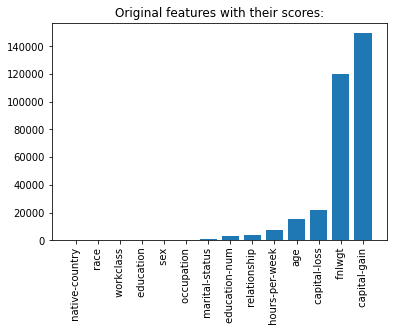


K chosen by elbow_point is: 11
K chosen by threshold (10000) is: 4
Minimal K is: 4

After reduction:
Feature: age,   Score: 15499
Feature:  capital-loss,   Score: 21906
Feature:  fnlwgt,   Score: 119726
Feature:  capital-gain,   Score: 149368


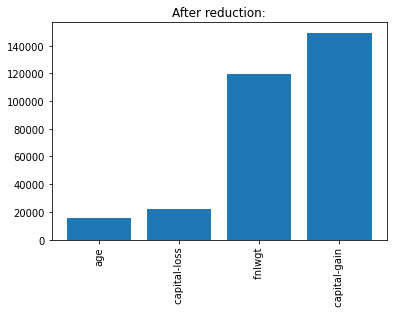

In [133]:
reduced_income = cs.chooseK("income_ds.csv", 14)            # Target column: income

Reduced data set after the process is:

In [134]:
reduced_income

10             11               12               13
0       capital-gain   capital-loss   hours-per-week   native-country
1               2174              0               40    United-States
2                  0              0               13    United-States
3                  0              0               40    United-States
4                  0              0               40    United-States
...              ...            ...              ...              ...
32557              0              0               38    United-States
32558              0              0               40    United-States
32559              0              0               40    United-States
32560              0              0               20    United-States
32561          15024              0               40    United-States

[32562 rows x 4 columns]

###### Titanic Dataset.

Start working on: titanic_ds.csv

Original number of features: 11
Original features with their scores:
Feature: Embarked,   Score: 5
Feature: Pclass,   Score: 10
Feature: Age,   Score: 82
Feature: Name,   Score: 91
Feature: Cabin,   Score: 96
Feature: SibSp,   Score: 108
Feature: Survived,   Score: 168
Feature: Parch,   Score: 202
Feature: Ticket,   Score: 702
Feature: PassengerId,   Score: 821
Feature: Fare,   Score: 861


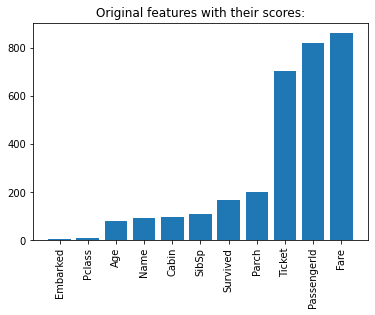


K chosen by elbow_point is: 9
K chosen by threshold (10000) is: 11
Minimal K is: 9

After reduction:
Feature: Age,   Score: 82
Feature: Name,   Score: 91
Feature: Cabin,   Score: 96
Feature: SibSp,   Score: 108
Feature: Survived,   Score: 168
Feature: Parch,   Score: 202
Feature: Ticket,   Score: 702
Feature: PassengerId,   Score: 821
Feature: Fare,   Score: 861


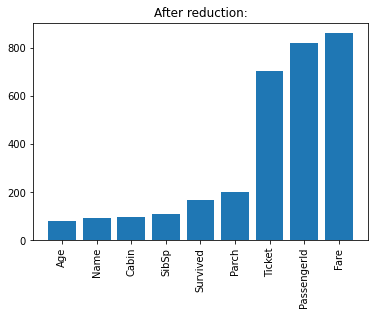

In [135]:
reduced_titanic = cs.chooseK("titanic_ds.csv", 4)            # Target column: Survived

In [136]:
reduced_titanic

2                                                  3    5      6   \
0    Pclass                                               Name  Age  SibSp   
1         3                            Braund, Mr. Owen Harris   22      1   
2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1   
3         3                             Heikkinen, Miss. Laina   26      0   
4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   35      1   
..      ...                                                ...  ...    ...   
887       2                              Montvila, Rev. Juozas   27      0   
888       1                       Graham, Miss. Margaret Edith   19      0   
889       3           Johnston, Miss. Catherine Helen "Carrie"  nan      1   
890       1                              Behr, Mr. Karl Howell   26      0   
891       3                                Dooley, Mr. Patrick   32      0   

        7                 8        9      10        11  
0    Parch            Ticket     Fare  Cabin  Embarked  
1        0         A/5 21171     7.25    nan         S  
2        0          PC 17599  71.2833    C85         C  
3        0  STON/O2. 3101282    7.925    nan         S  
4        0            113803     53.1   C123         S  
..     ...               ...      ...    ...       ...  
887      0            211536       13    nan         S  
888      0            112053       30    B42         S  
889      2        W./C. 6607    23.45    nan         S  
890      0            111369       30   C148         C  
891      0            370376     7.75    nan         Q  

[892 rows x 9 columns]

###### Video games sales Dataset.

Start working on: video_games_ds.csv

Original number of features: 15
Original features with their scores:
Feature: Rating,   Score: 1932
Feature: Genre,   Score: 2008
Feature: Year_of_Release,   Score: 2277
Feature: Critic_Score,   Score: 3244
Feature: Platform,   Score: 3494
Feature: User_Score,   Score: 4021
Feature: Critic_Count,   Score: 23861
Feature: Publisher,   Score: 59518
Feature: User_Count,   Score: 197999
Feature: Developer,   Score: 215785
Feature: Other_Sales,   Score: 455127
Feature: JP_Sales,   Score: 654872
Feature: EU_Sales,   Score: 1171320
Feature: Name,   Score: 1233660
Feature: NA_Sales,   Score: 1452446


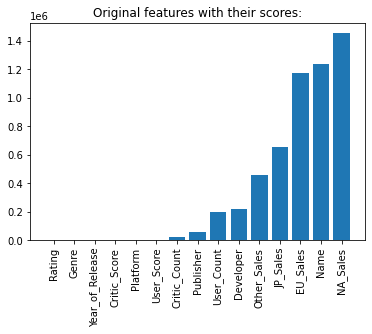


K chosen by elbow_point is: 9
K chosen by threshold (10000) is: 9
Minimal K is: 9

After reduction:
Feature: Critic_Count,   Score: 23861
Feature: Publisher,   Score: 59518
Feature: User_Count,   Score: 197999
Feature: Developer,   Score: 215785
Feature: Other_Sales,   Score: 455127
Feature: JP_Sales,   Score: 654872
Feature: EU_Sales,   Score: 1171320
Feature: Name,   Score: 1233660
Feature: NA_Sales,   Score: 1452446


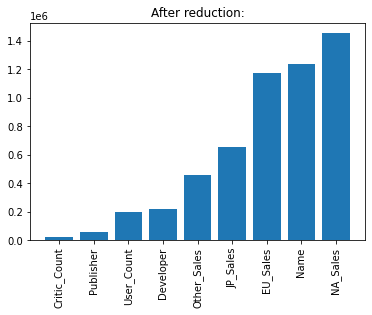

In [137]:
reduced_video_games = cs.chooseK("video_games_ds.csv", 9)        # Target column: Global_Sales

In [138]:
reduced_video_games

6         7            8             10            11  \
0      EU_Sales  JP_Sales  Other_Sales  Critic_Score  Critic_Count   
1         28.96      3.77         8.45            76            51   
2          3.58      6.81         0.77           nan           nan   
3         12.76      3.79         3.29            82            73   
4         10.93      3.28         2.95            80            73   
...         ...       ...          ...           ...           ...   
16715         0      0.01            0           nan           nan   
16716      0.01         0            0           nan           nan   
16717         0      0.01            0           nan           nan   
16718         0         0            0           nan           nan   
16719         0      0.01            0           nan           nan   

               12          13         14      15  
0      User_Score  User_Count  Developer  Rating  
1               8         322   Nintendo       E  
2             nan         nan        nan     nan  
3             8.3         709   Nintendo       E  
4               8         192   Nintendo       E  
...           ...         ...        ...     ...  
16715         nan         nan        nan     nan  
16716         nan         nan        nan     nan  
16717         nan         nan        nan     nan  
16718         nan         nan        nan     nan  
16719         nan         nan        nan     nan  

[16720 rows x 9 columns]